In [1]:
# Import Data Manipualtion Libraries
import pandas as pd
import numpy as np

# Imoport Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Machine Learning Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import Warnings Library
import warnings
warnings.filterwarnings('ignore')

# Impoer Logging Files
import logging
logging.basicConfig(level= logging.INFO,
                    filename='log.txt',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s'

)

In [2]:
logging.info('Importing Dataset Using Pandas Library')

In [3]:
# Load the dataset from the given URL
url = 'https://raw.githubusercontent.com/mukeshmagar543/Crop_Recommendation_Model/refs/heads/main/Crop_Recommendation.csv'

df = pd.read_csv(url)

df.sample(frac=1) # Shuffle the DataFrame

df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [4]:
from collections import OrderedDict
stats = []

for i in df.columns:
    if df[i].dtype != object:
        numerical_stats = OrderedDict({
            'Feature': i,
            'Type': df[i].dtype,
            'Missing': df[i].isnull().sum(),
            'Unique': df[i].nunique(),
            'Mode': df[i].mode().values[0],
            'Median': df[i].median(),
            'Mean': df[i].mean(),
            'Min' : df[i].min(),
            'Max' : df[i].max(),
            'Standard Deviation': df[i].std(),
            'Variance': df[i].var(),
            'Skewness': df[i].skew(),
            'Kurtosis': df[i].kurtosis(),
            'IQWR': df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)

stats = pd.DataFrame(stats)

stats

,Feature,Type,Missing,Unique,Mode,Median,Mean,Min,Max,Standard Deviation,Variance,Skewness,Kurtosis,IQWR
0,Nitrogen,int64,0,137,22.000000,37.000000,50.551818,0.000000,140.000000,36.917334,1362.889537,0.509721,-1.058240,63.250000
1,Phosphorus,int64,0,117,60.000000,51.000000,53.362727,5.000000,145.000000,32.985883,1088.068460,1.010773,0.860279,40.000000
2,Potassium,int64,0,73,17.000000,32.000000,48.149091,5.000000,205.000000,50.647931,2565.212869,2.375167,4.449354,29.000000
3,Temperature,float64,0,2200,8.825675,25.598693,25.616244,8.825675,43.675493,5.063749,25.641550,0.184933,1.232555,5.792279
4,Humidity,float64,0,2200,14.258040,80.473146,71.481779,14.258040,99.981876,22.263812,495.677307,-1.091708,0.302134,29.686818
5,pH_Value,float64,0,2200,3.504752,6.425045,6.469480,3.504752,9.935091,0.773938,0.598980,0.283929,1.655581,0.951950
6,Rainfall,float64,0,2200,20.211267,94.867624,103.463655,20.211267,298.560117,54.958389,3020.424469,0.965756,0.607079,59.715822
7,Rainfall,float64,0,2200,20.211267,94.867624,103.463655,20.211267,298.560117,54.958389,3020.424469,0.965756,0.607079,59.715822


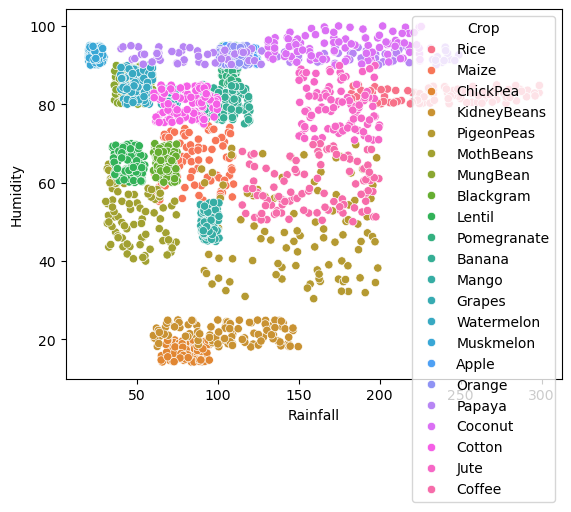

In [12]:
sns.scatterplot(data=df, x='Rainfall', y='Humidity', hue='Crop')
plt.show()

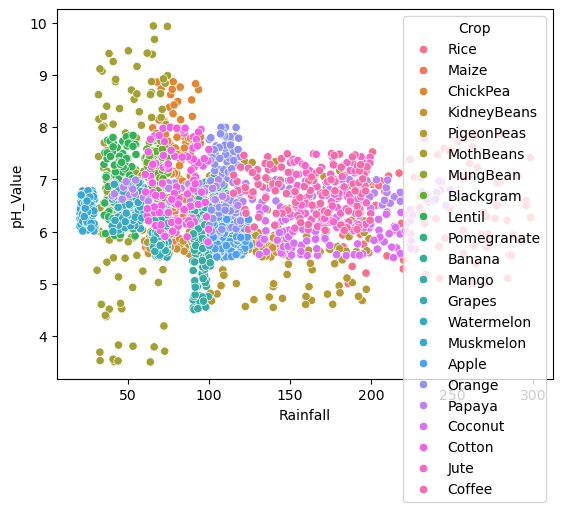

In [15]:
sns.scatterplot(data=df, x='Rainfall', y='pH_Value', hue='Crop')
plt.show()

In [ ]:
# Checking null values if any
df.isnull().sum()


Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [17]:
# Converting Categorical column  to Numerical ---> Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])

In [5]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [18]:
df.corr()['Crop']

Nitrogen      -0.031130
Phosphorus    -0.491006
Potassium     -0.346417
Temperature    0.113606
Humidity       0.193911
pH_Value      -0.012253
Rainfall       0.045611
Crop           1.000000
Name: Crop, dtype: float64

In [20]:
# Splitting the dataset into features (X) and target (y) variables

X = df.drop(columns=['Crop','Rainfall'])

y = df['Crop']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_test

1451    15
1334    21
1761    17
1735    17
1576     0
        ..
398      9
584     13
1702    17
292      3
1344    21
Name: Crop, Length: 660, dtype: int32

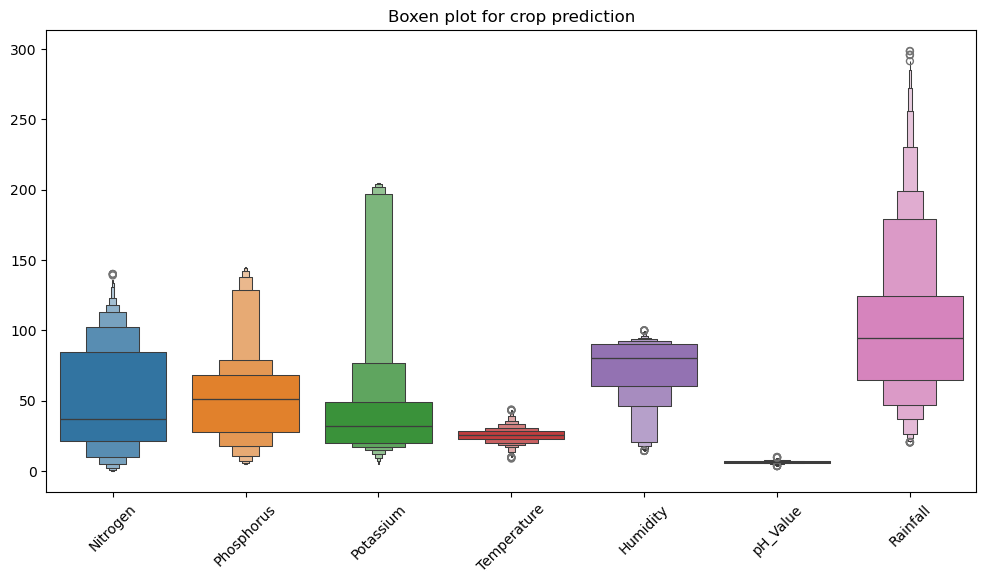

In [7]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.title('Boxen plot for crop prediction')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy_score_LR = accuracy_score(y_test,y_pred)
accuracy_score_LR


0.853030303030303

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)

accuracy_score_RF = accuracy_score(y_test, y_pred_RF)

print(accuracy_score_RF)



0.9606060606060606

In [23]:
RF.feature_importances_

array([0.13912765, 0.1864365 , 0.21808766, 0.11675081, 0.26153236,
       0.07806502])

In [24]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

accuracy_score_DT = accuracy_score(y_test,y_pred_DT)
accuracy_score_DT

0.9409090909090909